##load the dataset

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [2]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [4]:
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [5]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


##data preprocessing

In [7]:
from sklearn.model_selection import train_test_split
X = df[["Hours"]]
y = df[['Scores']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 42)

In [8]:
print("Training set size: ",X_train.shape)
print("Testing set size:",X_test.shape)


Training set size:  (20, 1)
Testing set size: (5, 1)


##training the model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

print(f"Intercept (β₀): {model.intercept_}")
print(f"Slope (β₁): {model.coef_[0]}")

Intercept (β₀): [2.82689235]
Slope (β₁): [9.68207815]


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict test set results
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 18.943211722315272
Root Mean Squared Error (RMSE): 4.352380006653288
Mean Absolute Error (MAE): 3.9207511902099244
R-squared (R²): 0.9678055545167994


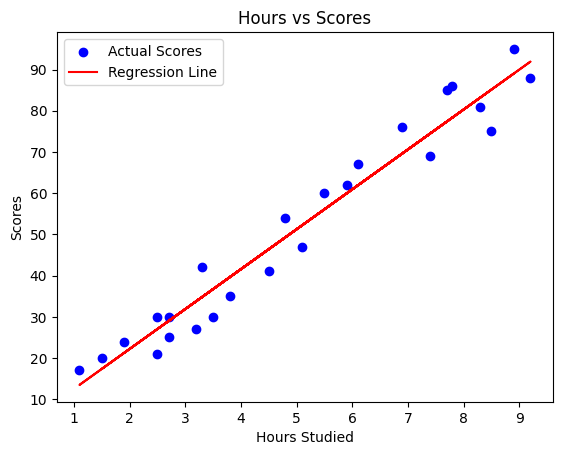

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.legend()
plt.show()


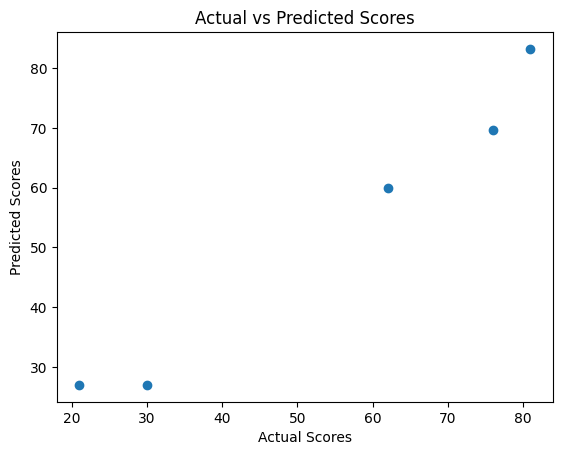

In [13]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Scores")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.show()
